In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense


In [56]:
def VGG_16(input_shape=(28, 28, 1), num_classes=10):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [58]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [60]:
model = VGG_16()

In [61]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [62]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 23s 10ms/step - loss: 0.1603 - accuracy: 0.9488 - val_loss: 0.0582 - val_accuracy: 0.9820
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0570 - accuracy: 0.9841 - val_loss: 0.0313 - val_accuracy: 0.9909
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0445 - accuracy: 0.9882 - val_loss: 0.0522 - val_accuracy: 0.9847
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0351 - accuracy: 0.9903 - val_loss: 0.1278 - val_accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0357 - accuracy: 0.9909 - val_loss: 0.0351 - val_accuracy: 0.9897


In [63]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0351 - accuracy: 0.9897
Test accuracy: 0.9897000193595886


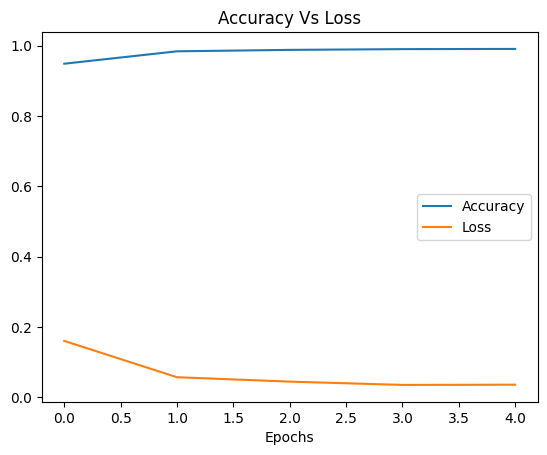

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],l abel = 'Accuracy')
plt.plot(history.history['loss'],label = 'Loss')
plt.xlabel('Epochs')
plt.title('Accuracy Vs Loss')
plt.legend()
plt.show()

In [65]:
model.summary()

Model: "vgg16_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 28, 28, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 14, 14, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 14, 14, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 14, 14, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 7, 7, 128)         

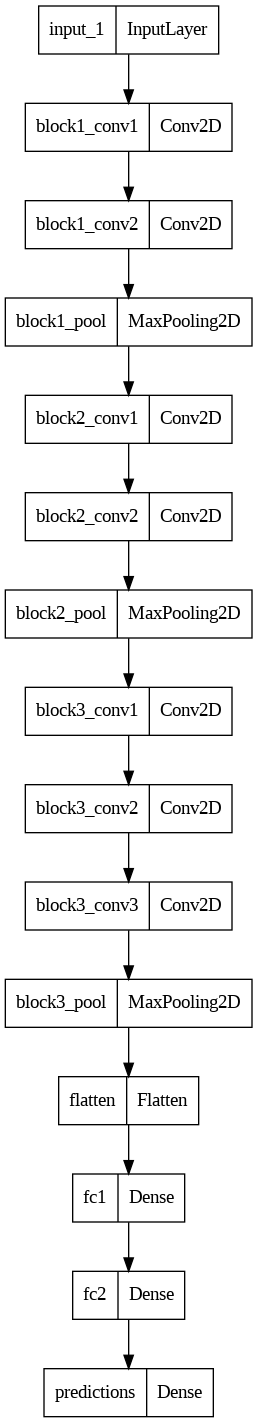

In [66]:
from keras.utils import plot_model
plot_model(model,to_file='vgg.png')

In [67]:
tf.saved_model.save(model, 'vgg')